 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [28]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [44]:
# Reading whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")
whale_portfolio = pd.read_csv(
                whale_returns_path,
                index_col = "Date",
                parse_dates=True, 
                infer_datetime_format=True)
whale_portfolio.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [46]:
# Count nulls
whale_portfolio.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [47]:
# Drop nulls
whale_portfolio = whale_portfolio.dropna()
whale_portfolio.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [48]:
# Reading algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")
algo_portfolio = pd.read_csv(
                algo_returns_path,
                index_col = "Date",
                parse_dates=True,
                infer_datetime_format=True)
algo_portfolio.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [49]:
# Count nulls 
algo_portfolio.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [50]:
algo_portfolio.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [51]:
# Drop nulls
algo_portfolio = algo_portfolio.dropna()
algo_portfolio.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [52]:
algo_portfolio.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [53]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("./Resources/sp500_history.csv")
sp500_portfolio = pd.read_csv(
                sp500_history_path,
                index_col="Date",
                parse_dates=True, 
                infer_datetime_format=True).sort_index(ascending=False)
sp500_portfolio["Close"] = sp500_portfolio["Close"].str.replace("$", " ")
sp500_portfolio.sort_index(inplace=True)
sp500_portfolio.head()

Close
Date                
2012-10-01   1444.49
2012-10-02   1445.75
2012-10-03   1450.99
2012-10-04   1461.40
2012-10-05   1460.93

In [54]:
# Check Data Types
sp500_portfolio.dtypes

Close    object
dtype: object

In [55]:
# Fix Data Types 
sp500_portfolio["Close"] = sp500_portfolio["Close"].astype("float")
sp500_portfolio.dtypes

Close    float64
dtype: object

In [56]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_portfolio.pct_change()
daily_returns_sp500.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [57]:
# Drop nulls
daily_returns_sp500 = daily_returns_sp500.dropna()
daily_returns_sp500.isna().sum()

Close    0
dtype: int64

In [58]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500 = daily_returns_sp500.rename(columns = {"Close": "S&P 500"},)
daily_returns_sp500.head()

S&P 500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [59]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio = pd.concat([whale_portfolio, algo_portfolio, daily_returns_sp500], axis="columns", join="inner")
combined_portfolio.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

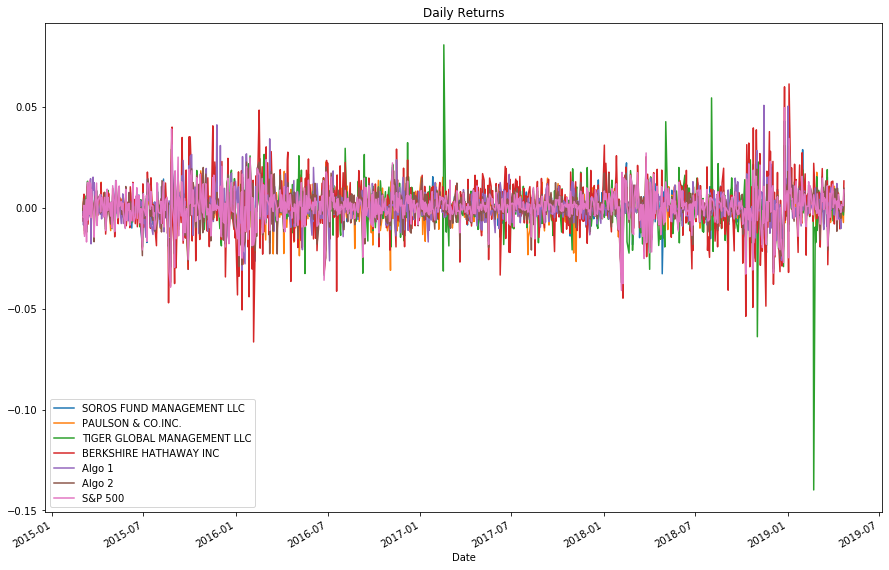

In [60]:
# Plot daily returns of all portfolios
combined_portfolio.plot(figsize=(15,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

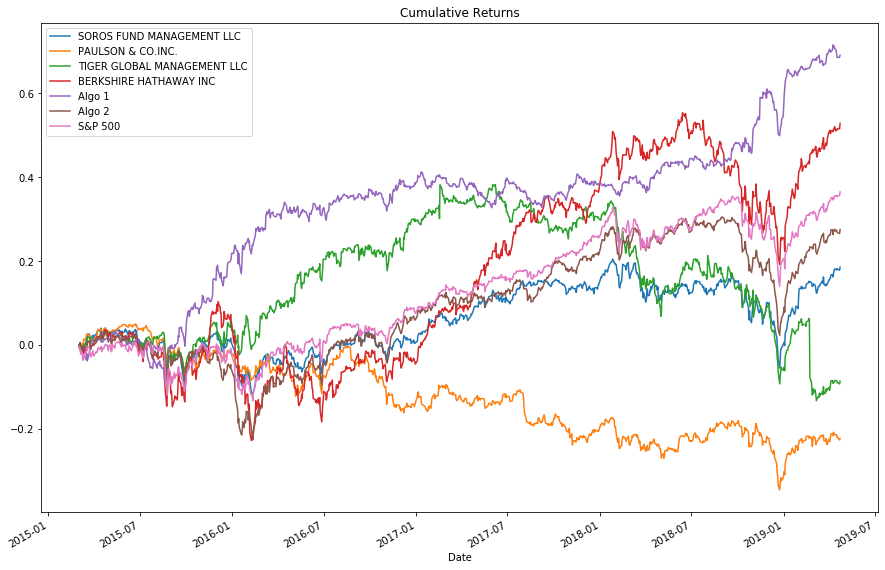

In [61]:
# Calculate cumulative returns of all portfolios
cumulative_returns = combined_portfolio.cumsum()
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


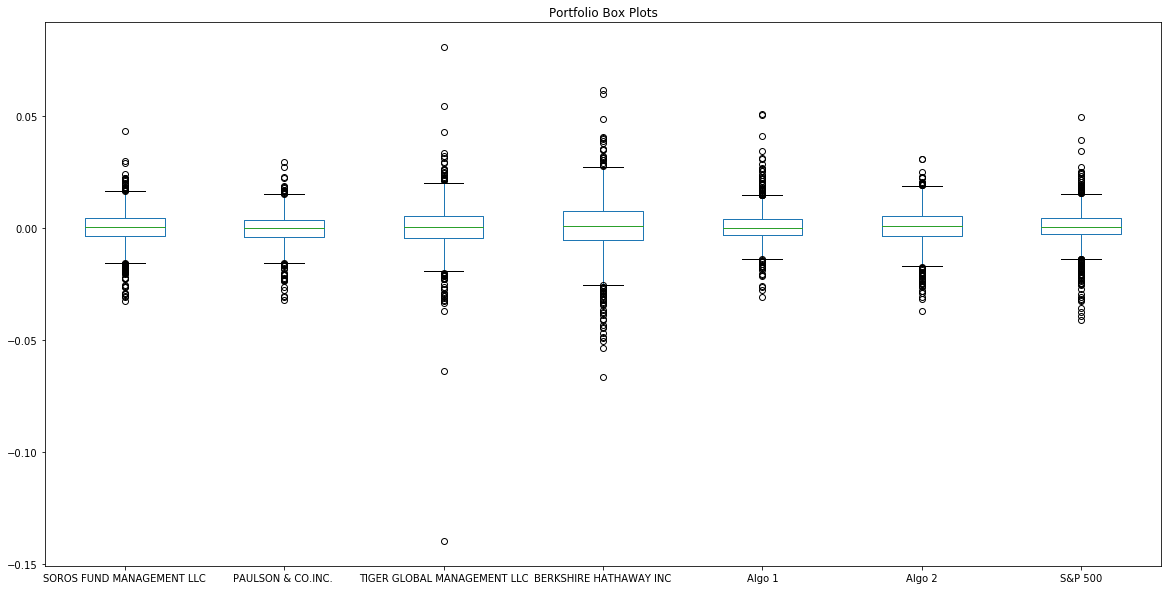

In [62]:
# Box plot to visually show risk
combined_portfolio.plot.box(title="Portfolio Box Plots", figsize=(20,10))

### Calculate Standard Deviations

In [63]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolio.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [64]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = daily_std["S&P 500"].std()
# Determine which portfolios are riskier than the S&P 500
risky_portfolio = daily_std > daily_std_sp500
risky_portfolio.head()

SOROS FUND MANAGEMENT LLC      True
PAULSON & CO.INC.              True
TIGER GLOBAL MANAGEMENT LLC    True
BERKSHIRE HATHAWAY INC         True
Algo 1                         True
dtype: bool

### Calculate the Annualized Standard Deviation

In [65]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

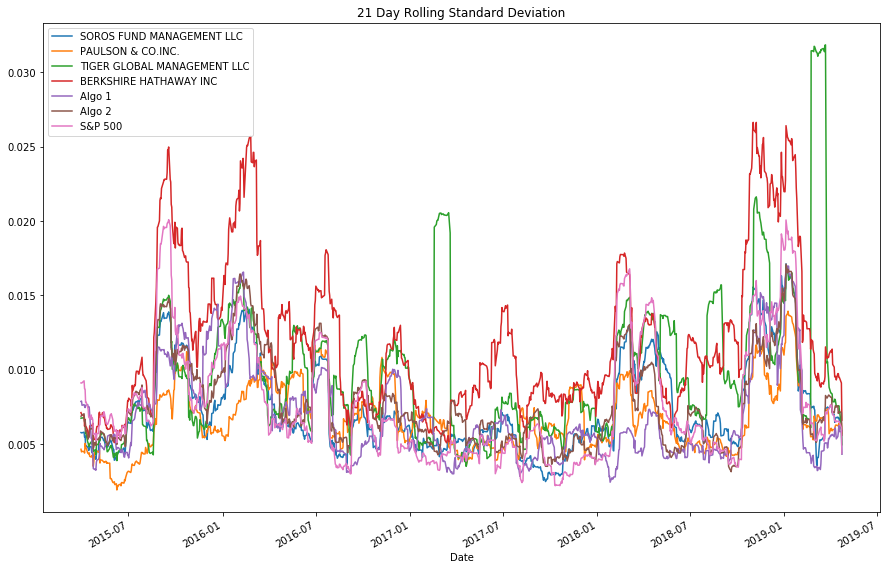

In [66]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolio = combined_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
combined_portfolio.plot(title="21 Day Rolling Standard Deviation", figsize=(15,10))

### Calculate and plot the correlation

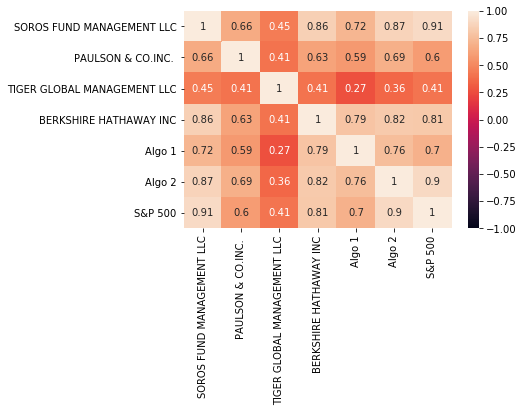

In [67]:
import seaborn as sns
# Calculate the correlation
correlation = combined_portfolio.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

# Calculate and Plot Beta for a chosen portfolio and the S&P 500


In [68]:
# Calculate covariance of a single portfolio
covariance = combined_portfolio["PAULSON & CO.INC. "].cov(combined_portfolio["S&P 500"])
covariance
# Calculate variance of S&P 500
variance = combined_portfolio["S&P 500"].var()
variance
# Computing beta
portfolio_beta = covariance / variance
# Plot beta trend
portfolio_beta_plot = portfolio_beta.plot(title="PAULSON & CO. INC. Beta", figsize=(20,10))

AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

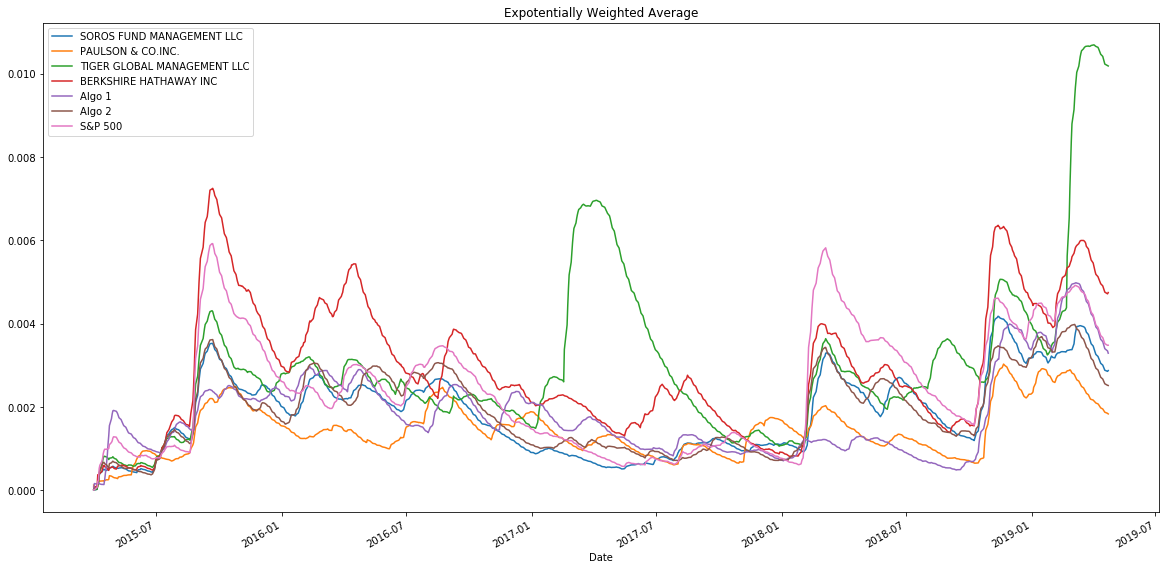

In [69]:
# Use `ewm` to calculate the rolling window
rolling_ewm = combined_portfolio.ewm(halflife=21, adjust=True).std().plot(title="Expotentially Weighted Average", figsize=(20, 10))
rolling_ewm

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_portfolio.mean()*252) / (combined_portfolio.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      37.468949
PAULSON & CO.INC.              48.185785
TIGER GLOBAL MANAGEMENT LLC    31.463574
BERKSHIRE HATHAWAY INC         36.601266
Algo 1                         34.053896
Algo 2                         39.814443
S&P 500                        30.036464
dtype: float64

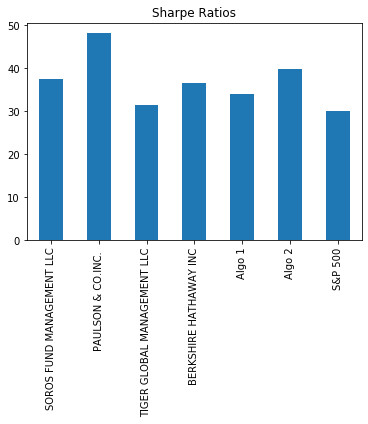

In [71]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [153]:
# Reading data from 1st stock
goog_data = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, parse_dates=True, infer_datetime_format=True)

In [154]:
# Reading data from 2nd stock
aapl_data = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, parse_dates=True, infer_datetime_format=True)

In [155]:
# Reading data from 3rd stock
cost_data = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, parse_dates=True, infer_datetime_format=True) 

In [156]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([goog_df, aapl_df, cost_df])
combined_stocks_df.head()

Symbol Trade DATE     NOCP
0   GOOG   5/9/2019  1162.38
1   GOOG   5/8/2019  1166.27
2   GOOG   5/7/2019  1174.10
3   GOOG   5/6/2019  1189.39
4   GOOG   5/3/2019  1185.40

In [157]:
# Reset Date index
combined_stocks_df = combined_stocks_df.reset_index()

In [158]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_df = combined_stocks_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_stocks_df.head()

Symbol        AAPL    COST     GOOG
Trade DATE                         
1/10/2019   153.80  210.64  1070.33
1/11/2019   152.29  210.51  1057.19
1/14/2019   150.00  209.00  1044.69
1/15/2019   153.07  211.03  1077.15
1/16/2019   154.94  210.18  1080.97

In [159]:
# Calculate daily returns
# Drop NAs
# Display sample data
daily_returns_combined = combined_stocks_df.pct_change().dropna()
daily_returns_combined.head()

Symbol          AAPL      COST      GOOG
Trade DATE                              
1/11/2019  -0.009818 -0.000617 -0.012277
1/14/2019  -0.015037 -0.007173 -0.011824
1/15/2019   0.020467  0.009713  0.031071
1/16/2019   0.012217 -0.004028  0.003546
1/17/2019   0.005938  0.006090  0.008261

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [160]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns = combined_stocks_df.dot(weights)
# Display sample data
portfolio_returns = portfolio_returns.rename("my_port")
portfolio_returns.head()

Trade DATE
1/10/2019    478.256667
1/11/2019    473.330000
1/14/2019    467.896667
1/15/2019    480.416667
1/16/2019    482.030000
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [161]:
# Join your returns DataFrame to the original returns DataFrame
all_returns_df = pd.concat([portfolio_returns, combined_stocks_df], axis="columns", join="inner")
all_returns_df.head()

0    AAPL    COST     GOOG
Trade DATE                                     
1/10/2019   478.256667  153.80  210.64  1070.33
1/11/2019   473.330000  152.29  210.51  1057.19
1/14/2019   467.896667  150.00  209.00  1044.69
1/15/2019   480.416667  153.07  211.03  1077.15
1/16/2019   482.030000  154.94  210.18  1080.97

In [162]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df.dropna()

0    AAPL    COST     GOOG
Trade DATE                                     
1/10/2019   478.256667  153.80  210.64  1070.33
1/11/2019   473.330000  152.29  210.51  1057.19
1/14/2019   467.896667  150.00  209.00  1044.69
1/15/2019   480.416667  153.07  211.03  1077.15
1/16/2019   482.030000  154.94  210.18  1080.97
...                ...     ...     ...      ...
9/28/2018   551.363333  225.74  234.88  1193.47
9/4/2018    553.346667  228.36  234.68  1197.00
9/5/2018    549.653333  226.87  235.61  1186.48
9/6/2018    543.740000  223.10  236.68  1171.44
9/7/2018    542.530000  221.30  241.46  1164.83

[250 rows x 4 columns]

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [163]:
# Calculate the annualized `std`
all_returns_df.std()

0       30.252708
AAPL    21.436472
COST    14.434399
GOOG    67.846776
dtype: float64

### Calculate and plot rolling `std` with 21-day window

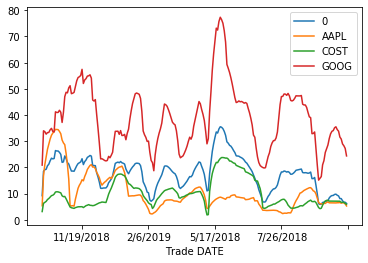

In [165]:
# Calculate rolling standard deviation
all_returns_roll = all_returns_df.rolling(window=21).std()
# Plot rolling standard deviation
all_returns_roll.plot()

### Calculate and plot the correlation

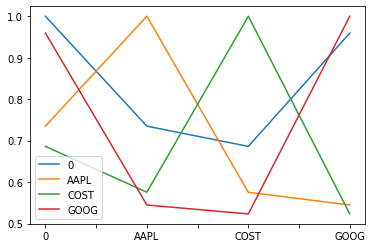

In [166]:
# Calculate and plot the correlation
all_returns_corr = all_returns_df.corr()
all_returns_corr.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [2]:
# Calculate and plot Beta
covariance = all_returns_df["my_port"].cov(all_returns_df["my_port"])
variance = all_returns_corr["my_port"]
my_port_beta = covariance / variance
my_port_beta.rolling(window=60)
my_port_beta.plot()

NameError: name 'all_returns_df' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1]:
# Calculate Annualzied Sharpe Ratios
annualized_sharpe_ratio = (daily_returns_combined.mean()*252) / (daily_returns_combined.std()*np.sqrt(252))
annualized_sharpe_ratio

NameError: name 'daily_returns_combined' is not defined

In [ ]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot.bar(title="Sharpe Raitos")

### How does your portfolio do?

Write your answer here!